Rubric
Your local instructor will evaluate your project (for the most part) using the following criteria.  You should make sure that you consider and/or follow most if not all of the considerations/recommendations outlined below **while** working through your project.

For Project 3 the evaluation categories are as follows:<br>
**The Data Science Process**
- Problem Statement
- Data Collection
- Data Cleaning & EDA
- Preprocessing & Modeling
- Evaluation and Conceptual Understanding
- Conclusion and Recommendations

**Organization and Professionalism**
- Organization
- Visualizations
- Python Syntax and Control Flow
- Presentation

**Scores will be out of 30 points based on the 10 categories in the rubric.** <br>
*3 points per section*<br>

| Score | Interpretation |
| --- | --- |
| **0** | *Project fails to meet the minimum requirements for this item.* |
| **1** | *Project meets the minimum requirements for this item, but falls significantly short of portfolio-ready expectations.* |
| **2** | *Project exceeds the minimum requirements for this item, but falls short of portfolio-ready expectations.* |
| **3** | *Project meets or exceeds portfolio-ready expectations; demonstrates a thorough understanding of every outlined consideration.* |


### The Data Science Process

**Problem Statement**
- Is it clear what the goal of the project is?
- What type of model will be developed?
- How will success be evaluated?
- Is the scope of the project appropriate?
- Is it clear who cares about this or why this is important to investigate?
- Does the student consider the audience and the primary and secondary stakeholders?

**Data Collection**
- Was enough data gathered to generate a significant result?
- Was data collected that was useful and relevant to the project?
- Was data collection and storage optimized through custom functions, pipelines, and/or automation?
- Was thought given to the server receiving the requests such as considering number of requests per second?

**Data Cleaning and EDA**
- Are missing values imputed/handled appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

**Preprocessing and Modeling**
- Is text data successfully converted to a matrix representation?
- Are methods such as stop words, stemming, and lemmatization explored?
- Does the student properly split and/or sample the data for validation/training purposes?
- Does the student test and evaluate a variety of models to identify a production algorithm (**AT MINIMUM:** Bayes and one other model)?
- Does the student defend their choice of production model relevant to the data at hand and the problem?
- Does the student explain how the model works and evaluate its performance successes/downfalls?

**Evaluation and Conceptual Understanding**
- Does the student accurately identify and explain the baseline score?
- Does the student select and use metrics relevant to the problem objective?
- Does the student interpret the results of their model for purposes of inference?
- Is domain knowledge demonstrated when interpreting results?
- Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?

**Conclusion and Recommendations**
- Does the student provide appropriate context to connect individual steps back to the overall project?
- Is it clear how the final recommendations were reached?
- Are the conclusions/recommendations clearly stated?
- Does the conclusion answer the original problem statement?
- Does the student address how findings of this research can be applied for the benefit of stakeholders?
- Are future steps to move the project forward identified?


### Organization and Professionalism

**Project Organization**
- Are modules imported correctly (using appropriate aliases)?
- Are data imported/saved using relative paths?
- Does the README provide a good executive summary of the project?
- Is markdown formatting used appropriately to structure notebooks?
- Are there an appropriate amount of comments to support the code?
- Are files & directories organized correctly?
- Are there unnecessary files included?
- Do files and directories have well-structured, appropriate, consistent names?

**Visualizations**
- Are sufficient visualizations provided?
- Do plots accurately demonstrate valid relationships?
- Are plots labeled properly?
- Are plots interpreted appropriately?
- Are plots formatted and scaled appropriately for inclusion in a notebook-based technical report?

**Python Syntax and Control Flow**
- Is care taken to write human readable code?
- Is the code syntactically correct (no runtime errors)?
- Does the code generate desired results (logically correct)?
- Does the code follows general best practices and style guidelines?
- Are Pandas functions used appropriately?
- Are `sklearn` and `NLTK` methods used appropriately?

**Presentation**
- Is the problem statement clearly presented?
- Does a strong narrative run through the presentation building toward a final conclusion?
- Are the conclusions/recommendations clearly stated?
- Is the level of technicality appropriate for the intended audience?
- Is the student substantially over or under time?
- Does the student appropriately pace their presentation?
- Does the student deliver their message with clarity and volume?
- Are appropriate visualizations generated for the intended audience?
- Are visualizations necessary and useful for supporting conclusions/explaining findings?


## Executive Summary

To address the challenge of finding the correct reddit post, our first strategy is to finalize a good reddit source for comparing the two popular sports Soccer and Cricekt. While most of us think Soccer as the most popular sports, data told us a different story. Cricket is played around 50 countries with 2.5 billion fans while football is played in over 200 countries with 3.5 billion fans. In other words per country there are 50 million cricket fans compared to 17.5 million football fans. It was a challenge to get a correct key word for the amount of data that we needed. We started with specific clubs of these sports and generalized to get enough data. 

Another challenge we were having was getting enough data (our target was close to 2000 records in each subreddit). I had to change the day window to attain this objective. Once I adjusted the day window to 15 and appropriate fequency I was able to collect enough data for training our models.

After extracting the blog post data next decision we had to make was what column or columns needs to be my X. We were inclined to use 'Title' and 'Self text' consdering the relevance of the contents. But after reviewing the shape of data and Null values we have decided to use only 'Title' as 'Self Text' was not adding much value in training my model.  

EDA helped me set up a preprocessing plan for our model. For preprocessing, I had created a fucntion that used regex, lemmatizatizer which removed punctuation and stopwords. For modeling, I used  TFIDF and Count vetorizers. They brought context of word choices into play, which will give us a better understanding of the group of words used in a reddit blog post about the sports we are analyzing.
 
Machines had no problem understanding the blog posts, after using vectorizers.

## Problem Statement

ESPN has hired DevJee Inc. to address a data collection issue in their market research team. The market research team is responsible for analyzing  and compiling online fan participation in two major sports viz. Cricket and Soccer. The feeds are coming from Subreddit blogs.
The issue we are facing is the team of interns that collects the data doesn't have much idea of these sports and mixes the blogs before passing it to the research team. We are tasked to come out with a solution that correctly identifies the type of blogs.
  - We will be using Using Pushshift's API to collect the data from subreddits of Cricket and Soccer.  
  - We will use NLP to train a classifier on which subreddit a given post came from. 
  - We will be using 1) Testing Accuracy Score 2) Confusion Matrix 3) ROC Curve to evaluate our best model


![title](../images/Cric_Soccer.png)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import time
import requests

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import datetime as dt
import time

from sklearn.metrics import roc_auc_score

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import regex as re
import nltk
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore") 

#importing GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin # this allows us to create a custom transformer

%matplotlib inline

## Data Collection

In [2]:
#Read the data for Cricket
df_cricket = pd.read_csv("../data/cricket.csv",index_col=0)

In [3]:
#Read the data for Soccer
df_soccer = pd.read_csv("../data/soccer.csv", index_col=0)

In [4]:
df_cricket.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,How Far Away Is The Standard Of Women's Cricke...,"Hey, guys, I was wondering how far away do you...",Cricket,1578939100,Equivalent-Winner,10,1,True,2020-01-13
6,Nitro Strength Muscle supplement,[removed],Cricket,1578946035,Jonson15555,0,1,True,2020-01-13
13,"In International Test Cricket, What Was The Be...","Hey, guys IMO Brendon McCullum's 302 vs India ...",Cricket,1578950019,Equivalent-Winner,10,1,True,2020-01-13
15,Why Is Cricket Not Played At The Olympics?,I believe there was a cricket tournament playe...,Cricket,1578952373,Equivalent-Winner,14,1,True,2020-01-13
17,Who is the Cricketer of the Decade?,1. **Virat Kohli**\n2. **Ab Devillers**\n3. **...,Cricket,1578953445,Mudasariqbal,7,1,True,2020-01-13


In [5]:
df_cricket.shape

(2458, 9)

In [6]:
df_soccer.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
6,Can someone explain to me how to U23 system wo...,I just watched YouTube highlight video from Ev...,soccer,1579370480,coco4shade,33,1,True,2020-01-18
8,hi,[removed],soccer,1579370636,CecileSmith11,0,1,True,2020-01-18
14,hi,[removed],soccer,1579371306,CecileSmith11,0,1,True,2020-01-18
22,hi,[removed],soccer,1579371939,CecileSmith11,0,1,True,2020-01-18
23,In most countries the word for goal has the sa...,[removed],soccer,1579371966,barbapapi_,0,1,True,2020-01-18


In [7]:
df_soccer.shape

(2059, 9)

In [8]:
# combining both the dataframes using concatenate
combined_df = pd.concat(objs = [df_cricket, df_soccer],
                    axis = 0)

In [9]:
combined_df.shape

(4517, 9)

## Data Cleaning & EDA

In [10]:
#checking for Null values in the dataframe
#combined_df[combined_df.isnull().any(axis=1)]
combined_df.isnull().sum()

title            0
selftext        70
subreddit        0
created_utc      0
author           0
num_comments     0
score            0
is_self          0
timestamp        0
dtype: int64

In [11]:
#checking for duplicates
combined_df.duplicated().sum()

0

In [12]:
#Checking that data in our target column 'cAGR'
combined_df['subreddit'].describe()

count        4517
unique          2
top       Cricket
freq         2458
Name: subreddit, dtype: object

In [13]:
#converting the categorical columns 'Cricket' and 'soccer' to 1 and 0
combined_df['subreddit'] = combined_df['subreddit'].map({'Cricket': 1, 'soccer': 0})

In [14]:
combined_df['subreddit'].describe()

count    4517.000000
mean        0.544166
std         0.498101
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: subreddit, dtype: float64

In [15]:
combined_df['title'].describe()

count                             4517
unique                            4319
top       공식 스포츠토토 — 안전놀이터 추천 by happy
freq                                27
Name: title, dtype: object

In [16]:
combined_df['selftext'] = combined_df['selftext'].str.replace('removed','')
combined_df['selftext'] = combined_df['selftext'].str.replace('[','')
combined_df['selftext'] = combined_df['selftext'].str.replace(']','')

### Understaning the day wise trend of posts.

In [17]:
# AN ASIDE: using dt.date.fromtimestamp
dt.date.fromtimestamp(1579572662) # converts epoch time to datetime

datetime.date(2020, 1, 20)

In [18]:
# Creating `timestamp` column using `created_utc` column
combined_df["timestamp"] = combined_df["created_utc"].map(dt.date.fromtimestamp)
combined_df["timestamp"].head()

0     2020-01-13
6     2020-01-13
13    2020-01-13
15    2020-01-13
17    2020-01-13
Name: timestamp, dtype: object

In [19]:
#making the days into an array of numbers
combined_df['timestamp'] = pd.to_datetime(combined_df.timestamp) 
combined_df['day'] = combined_df['timestamp'].dt.dayofweek
combined_df['day'].unique()

array([0, 1, 2, 3, 4, 6, 5])

In [20]:
# assigning key value to the weekdays from Monday thru Friday using .map method.
combined_df['weekday'] = combined_df['day'].map({0: 'Monday', 
                               1: 'Tuesday',
                               2: 'Wednsday',
                               3: 'Thursday',
                               4: 'Friday',
                               5: 'Saturday',
                               6: 'Sunday'})
combined_df['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednsday', 'Thursday', 'Friday', 'Sunday',
       'Saturday'], dtype=object)

In [21]:
#finding the daywise totals of the comments.
combined_df['weekday'].value_counts()

Saturday    783
Sunday      739
Tuesday     707
Wednsday    694
Monday      567
Thursday    518
Friday      509
Name: weekday, dtype: int64

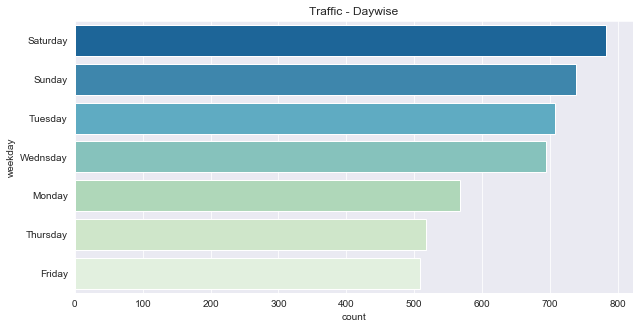

In [22]:
#Plot of posts traffic - Day wise
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.title('Traffic - Daywise')
sns.countplot(data=combined_df,
              y='weekday', 
              order = combined_df['weekday'].value_counts().index,
              palette="GnBu_r");

### Most commented posts

In [23]:
# finding the posts those have has more than 10000 
df1_comments = combined_df[(combined_df['subreddit'] == 1) & (combined_df['num_comments']> 10000)]
df1_comments

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp,day,weekday
44,Match Thread: 1st ODI - India v Australia,1st ODI - India v Australia,1,1578982362,CricketMatchBot,14378,1,True,2020-01-14,1,Tuesday
467,Match Thread: 2nd ODI - India v Australia,2nd ODI - India v Australia,1,1579241683,CricketMatchBot,15126,1,True,2020-01-17,4,Friday
479,Match Thread: 3rd Test - Australia v New Zeala...,"###3rd Test, ICC World Test Championship at Sy...",1,1578001159,CricketMatchBot,14182,332,True,2020-01-02,3,Thursday
61,"Match Thread: 2nd Test - England v Australia, ...","2nd Test - England v Australia, Day 4",1,1566029688,CricketMatchBot,13182,310,True,2019-08-17,5,Saturday
216,"Match Thread: 2nd Test - England v Australia, ...","2nd Test - England v Australia, Day 5",1,1566116021,CricketMatchBot,12662,346,True,2019-08-18,6,Sunday
96,"Match Thread: 1st Test - England v Australia, ...","1st Test - England v Australia, Day 2",1,1564733461,CricketMatchBot,10263,413,True,2019-08-02,4,Friday
370,"Match Thread: 1st Test - England v Australia, ...","1st Test - England v Australia, Day 4",1,1564906164,CricketMatchBot,13813,386,True,2019-08-04,6,Sunday
182,Match Thread: 41st match - England v New Zealand,41st match - England v New Zealand,1,1562139302,CricketMatchBot,17470,586,True,2019-07-03,2,Wednsday
359,Match Thread: 25th match - New Zealand v South...,25th match - New Zealand v South Africa,1,1560930016,CricketMatchBot,10575,505,True,2019-06-19,2,Wednsday


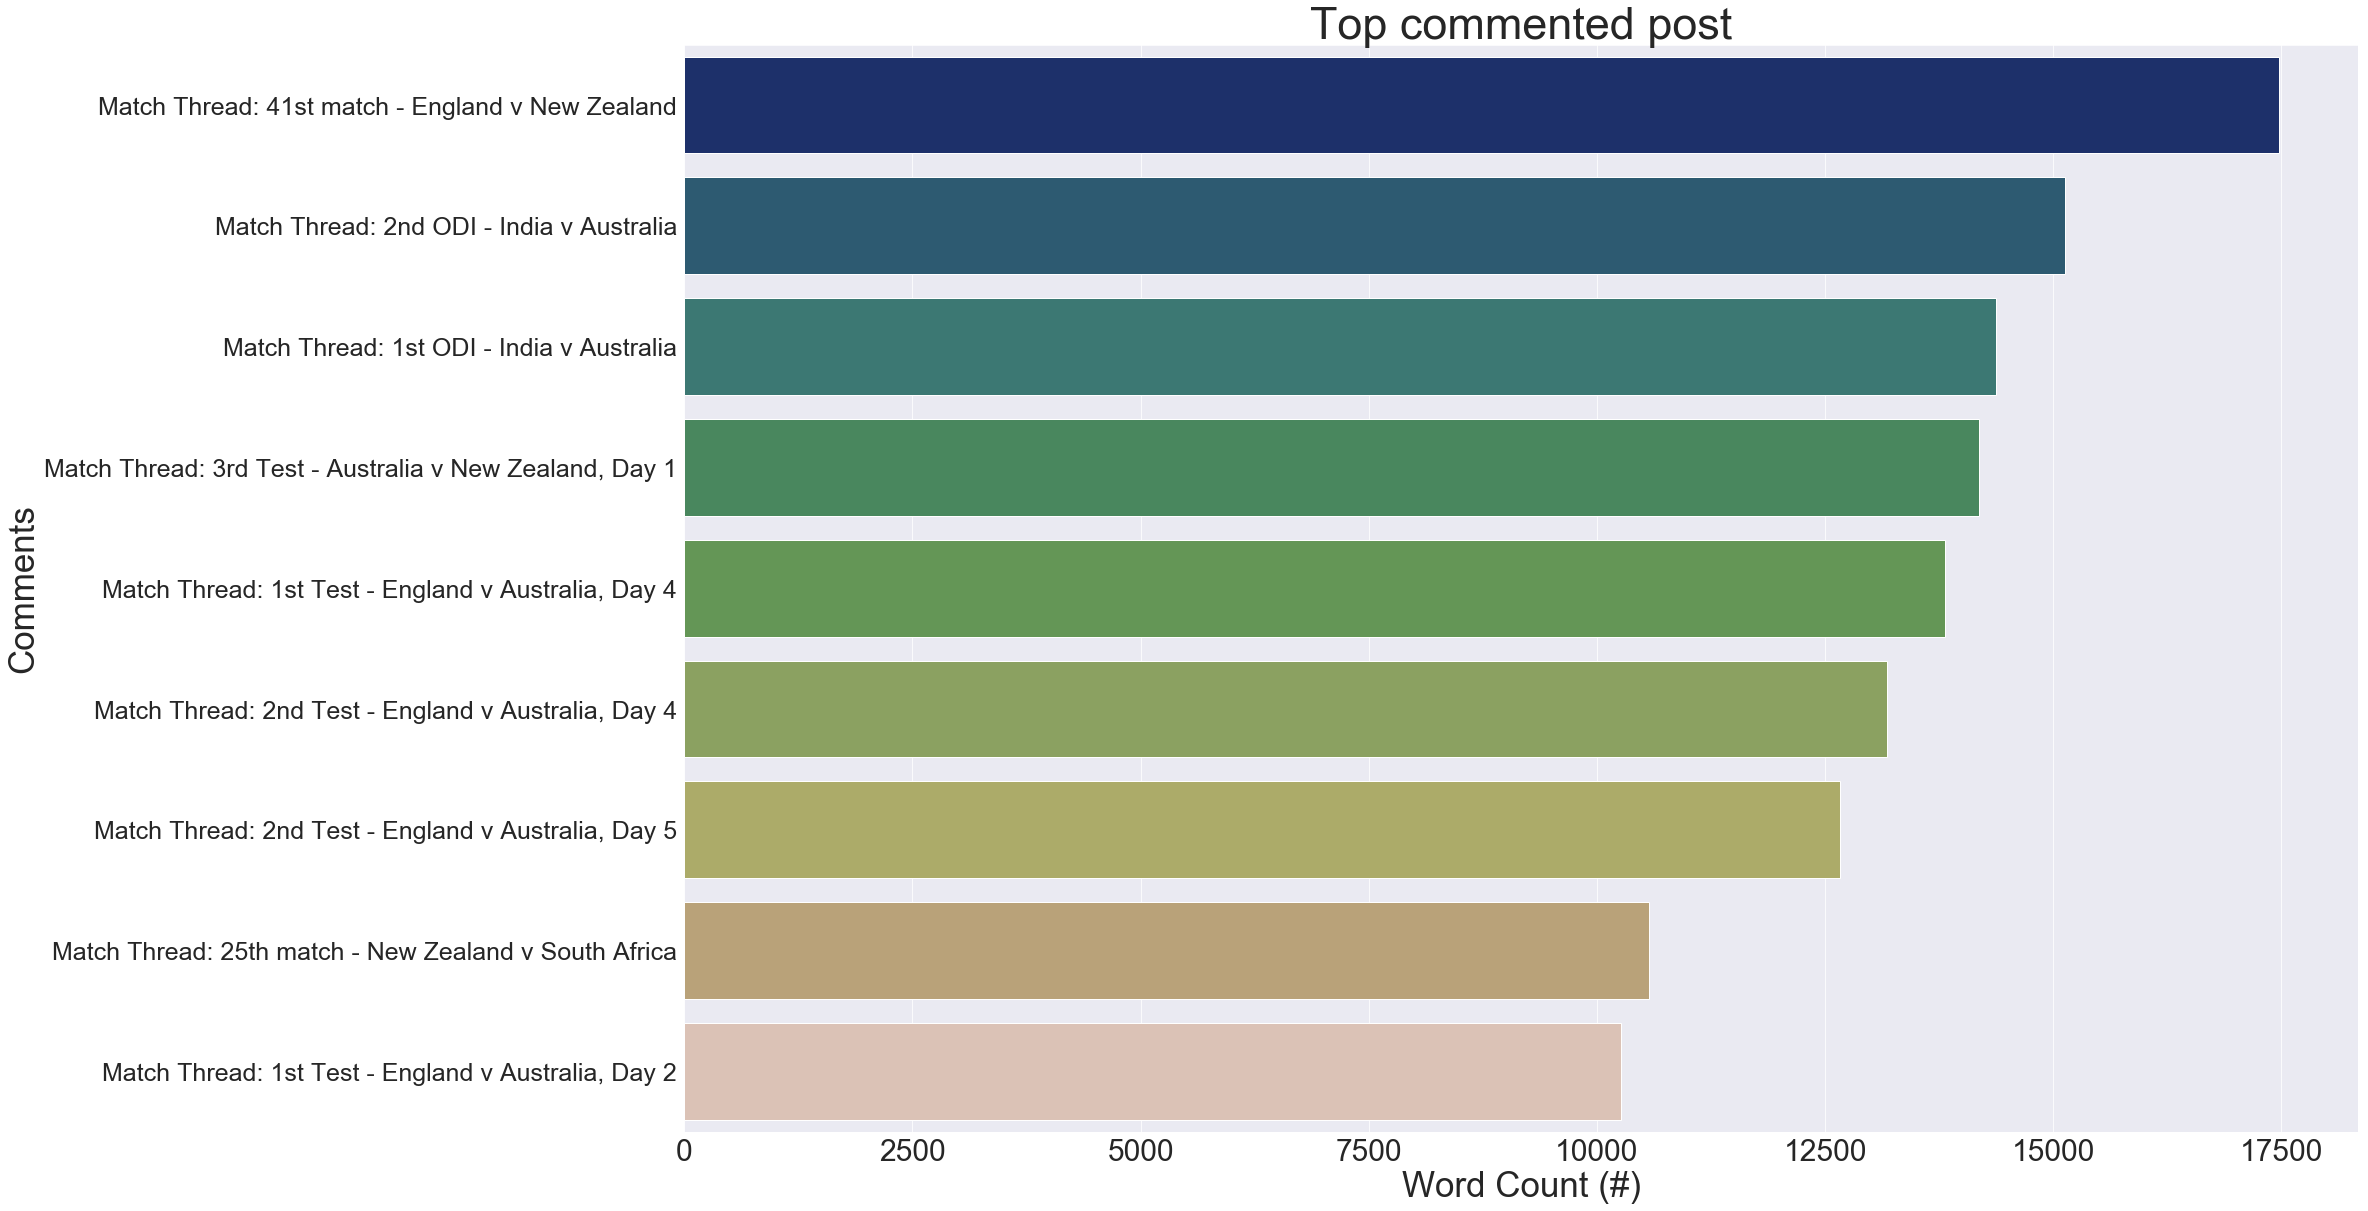

In [24]:
# visualizing the top commented posts.
plt.figure(figsize=(30,20))
plt.title ('Top commented post',
           size=45);
sns.barplot(data=df1_comments.sort_values('num_comments',ascending=False),
            y='title',
            x='num_comments',
            palette="gist_earth")
plt.ylabel('Comments', size = 35);
plt.xlabel('Word Count (#)', size = 35);
plt.yticks(size = 25);
plt.xticks(size = 30);

### Finding the most frequently used words

In [25]:
# finding the most frequently used words
cvec = CountVectorizer( stop_words = 'english')
combined_df_cv = cvec.fit(combined_df['title'])

In [26]:
#Thanks to Varun / Ruchika for helping in this logic
combined_df_cv = pd.DataFrame(cvec.transform(combined_df['title']).todense(),columns=cvec.get_feature_names())
highest_cv = combined_df_cv.sum(axis=0)
combined_df_cvec = highest_cv.sort_values(ascending = False).head(10)
combined_df_cvec = pd.DataFrame(combined_df_cvec, columns = ['Count_Vectorizer(units)'])
combined_df_cvec

,Count_Vectorizer(units)
match,1276
thread,1105
vs,679
cricket,324
league,309
test,275
post,273
cup,261
2019,257
world,225


In [27]:
# creating the list of stop words
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = list(combined_df_cvec.index) #popular words from post
stopwords.extend(newStopWords) # updating the standard stop words

In [28]:
stopwords1 = nltk.corpus.stopwords.words('english').append(['soccer', 'cricket'])

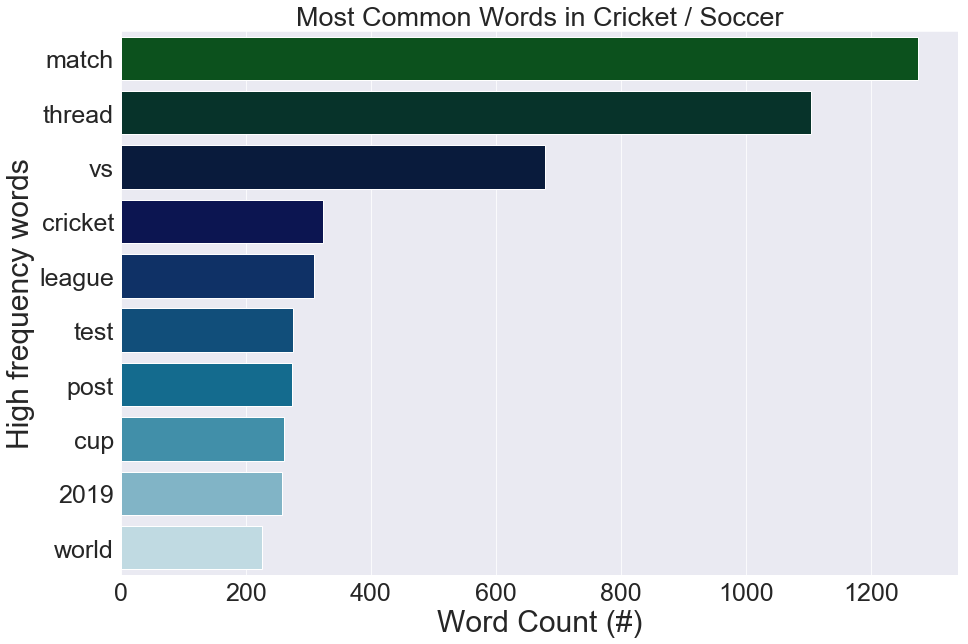

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data=combined_df_cvec,
            y=list(combined_df_cvec.index),
            x='Count_Vectorizer(units)',
            palette="ocean");
#Setting the title to size 30
plt.title ('Most Common Words in Cricket / Soccer',
           size=27);
plt.ylabel('High frequency words', size = 30);
plt.xlabel('Word Count (#)', size = 30);
#setting size of yticks and xticks to 25
plt.yticks(size = 25);
plt.xticks(size = 25);

## Preprocessing & Modeling

### Base line model

In [30]:
# Train test split
X = combined_df['title']
y = combined_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, stratify = y)

In [31]:
#calculating base line score. 
y.value_counts(normalize = True)

1    0.544166
0    0.455834
Name: subreddit, dtype: float64

 **Base Line score of our model is 0.54**

In [32]:
#with help from Ruchika on the logic
def pre_process(string):
    string = re.sub('[0-9]+', '', string) # using regex converting numbers to ''
    lemmatizer = WordNetLemmatizer() # lemmatizing the text
    lem_list = []
    strings = string.split()
    for word in strings:
        lem_string = lemmatizer.lemmatize(word) 
        lem_list.append(lem_string)
    lem_sentence = ' '.join(lem_list)
    return lem_sentence

### Logistics  - Count vec 

In [33]:
# From Mahdi's local lessons 
# using pipe function to 

pipe = Pipeline(steps = [('vectorizer', CountVectorizer(pre_process)), # first tuple is for first step: vectorizer
                         ('model', LogisticRegression(solver = 'liblinear'))
                         
                        ])    

# Construct Grid Parameters
hyperparams = {'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__stop_words': [stopwords1, stopwords, None ],
               'vectorizer__max_features' : [100,500],# how to make sure all test cases
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left in)
               'model__penalty': ['l1', 'l2'], # for Ridge and Lasso
               'model__C': [3, 10, 1000]
                
              }

 # Perform Grid Search
gs = GridSearchCV(pipe, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')
results = gs.fit(X_train, y_train)

In [34]:
#running score with best params
gs_model = gs.best_estimator_
gs_model.score(X_train, y_train)

0.9186966149952547

In [35]:
# Get score
train_score = gs.best_score_
print('Best CV accuracy: {:.4f}'.format(train_score))

test_score = gs.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(test_score))

test_score = gs.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best CV accuracy: 0.8538
Best TRAIN set accuracy: 0.9187
Best TEST set accuracy: 0.8709


**Interpretation of the model : The above Logistic Regression model with CountVectorizer has accuracy of 0.92 for my training set and has accuracy 0.87 for my testing set. This model outpeformed my baseline model score of 0.54**

###  Logistic - TFIDF

In [36]:
# From Mahdi's local lessons 

pipe = Pipeline(steps = [('vectorizer', TfidfVectorizer(pre_process)), # first tuple is for first step: vectorizer
                         ('model', LogisticRegression(solver = 'liblinear'))
                         
                        ])    

# Construct Grid Parameters
hyperparams = {'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__stop_words': ['english', stopwords, None ],
               'vectorizer__max_features' : [100,500],# how to make sure all test cases
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left in)
               'model__penalty': ['l1', 'l2'], # for Ridge and Lasso
               'model__C': [3, 10, 1000]
                
              }

 # Perform Grid Search
gs_tfdf = GridSearchCV(pipe, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')
results = gs_tfdf.fit(X_train, y_train)

In [37]:
# predicting 
preds_tfdf = gs_tfdf.predict(X_test)

In [38]:
#running score with best params
gs_tfdf_model = gs_tfdf.best_estimator_
gs_tfdf_model.score(X_train, y_train)

0.9190129705789307

In [39]:
# Get score

test_score = gs_tfdf.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(test_score))

test_score = gs_tfdf.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN set accuracy: 0.9190
Best TEST set accuracy: 0.8798


**Interpretation of the model : The above Logistic Regression model with Tfidf Vectorizer has accuracy of 0.91 for my training set and has accuracy 0.88 for my testing set. This model outperformed my baseline model score of 0.54**

###  Gaussian - Count vec 

In [40]:
# adapted from https://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [41]:
cvec_guasNB_pipe_list = [
    ("cvec", CountVectorizer()),
    ("_",DenseTransformer()),
    ("guas", GaussianNB())
]

cvec_guasNB_params = {
    'cvec__max_features': [100,1000],
    'cvec__max_df': [.5,.8],
    'cvec__ngram_range': [(1,1),(1,2)],
    'cvec__stop_words': ['english', None],
}

pipe = Pipeline(cvec_guasNB_pipe_list)

cvec_guasNB = GridSearchCV(pipe, cvec_guasNB_params, cv = 5, scoring = 'accuracy')

In [42]:
model = cvec_guasNB.fit(X_train, y_train)

In [43]:
# Get score
train_score = model.best_score_
print('Best TRAIN accuracy: {:.4f}'.format(train_score))
test_score = model.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN accuracy: 0.8671
Best TEST set accuracy: 0.8628


**Interpretation of the model : The above Gaussian NB model with Count Vectorizer has accuracy of 0.87 for my training set and has accuracy 0.86 for my testing set. This model outperformed my baseline model score of 0.54**

### Multinomial - TFIDF

In [44]:
pipe_tf_mn = Pipeline(steps = [('vectorizer', TfidfVectorizer()),     # first tuple is for first step: vectorizer
                         ('model', MultinomialNB()),
                        # second tuple is for second step: model
                        ])    

# Construct Grid Parameters
hyperparams = {'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__stop_words': ['english', None],
               'vectorizer__max_features' : [100,500]} # how to make sure all test cases
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left

 # Perform Grid Search
gs_bayes_tf_mn = GridSearchCV(pipe_tf_mn, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')

In [45]:
results_bayes_tf = gs_bayes_tf_mn.fit(X_train, y_train)
print('Best TRAIN accuracy: {:.4f}'.format(train_score))
test_score = results_bayes_tf.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN accuracy: 0.8671
Best TEST set accuracy: 0.8614


**Interpretation of the model : The above Multinomial NB model with Count Vectorizer has accuracy of 0.87 for my training set and has accuracy 0.86 for my testing set. This model outperformed my baseline model score of 0.54**

### Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=100)

In [47]:
et = ExtraTreesClassifier(n_estimators=100)

In [48]:
pipe_rf = Pipeline(steps = [('vectorizer', TfidfVectorizer()),     # first tuple is for first step: vectorizer
                         ('rf', RandomForestClassifier(n_estimators=100)),
                        # second tuple is for second step: model
                        ])    

# Construct Grid Parameters
hyperparams = {'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__stop_words': ['english', None],
               'vectorizer__max_features' : [100,500]} # how to make sure all test cases
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left

 # Perform Grid Search
gs_rf = GridSearchCV(pipe_tf_mn, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')

In [49]:
results_gs_rf = gs_rf.fit(X_train, y_train)
print('Best TRAIN accuracy: {:.4f}'.format(train_score))
test_score = results_gs_rf.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN accuracy: 0.8671
Best TEST set accuracy: 0.8614


**Interpretation of the model : The above RandomForest Classifier model with Tfidf Vectorizer has accuracy of 0.87 for my training set and has accuracy 0.86 for my testing set. This model outperformed my baseline model score of 0.54**

## Model Selection and Evaluation 

I will be using the following criteria to evaluate my model:


**The model I have chosen to evaluate is Logistic Regression with TFIDF vectorizer**


1) Testing Accuracy Score

2) Confusion Matrix

3) ROC Curve

**Model performance at a glance :**

| Vect .     | Classifier | Train Score | Test Score |
|------------|------------|-------------|------------|
|            | Base Line  | 0.54        |            |
| Count vect | LogisticReg| 0.91        | 0.88       |
| TfidfVec   | LogisticReg| 0.92        | 0.88       |
| Count vect | GaussianNB | 0.87        | 0.86       |
| TFIDF      | Multinomial| 0.87        | 0.86       |
| TFIDF      | Randm Forst| 0.87        | 0.87       |

Logistic regression with TFIDF vectorizer produced better results than other machine models .

#### Testing Accuracy Score

In [55]:
# Accuracy score for Logistic regression with TFIDF vectorizer

test_score = gs_tfdf.score(X_train, y_train)
print('Best TRAIN set accuracy: {:.4f}'.format(test_score))

test_score = gs_tfdf.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN set accuracy: 0.9190
Best TEST set accuracy: 0.8798


#### Confusion Matrix - Logistic regression with Count vectorizer and TFIDF vectorize

**Building confusion Matrix for my best performing TFIDF model**

In [50]:
def c_confusion_matrix(y_true, y_pred):
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = y_true.unique()
    labels.sort()
    
    # plotting
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
    
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

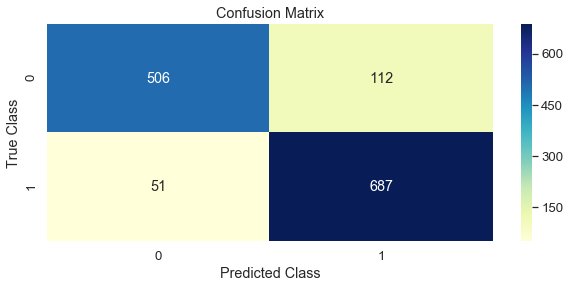

In [51]:
# get predictions
preds_tfdf = gs_tfdf.predict(X_test)
c_confusion_matrix(y_test, preds_tfdf)

 - The "1" which is Cricket category is predicted correctly => True positive score = 687
 - The "1" which is Cricket category is predicted incorrectly => False positive = 51
 - The "0" which is 'Soccer' category is predicted correctly => True negative = 506
 - The "0" which is 'Soccer' category is predicted incorrectly => False positive = 112

**Confusion Matrix Scores:**


 - Accuracy Score = 0.88

 - Misclassification Score = 0.12

 - Specificity = 0.82 (TN / (TN + FP))

 - Precision = 0.86 (TN/TN + TP)

 - Sensitivity = 0.93 (TP/TP + FN)



#### ROC AUC Curve

Receiver Operating Characteristic (ROC) Curve  & Area under the ROC curve
 - I am using Receiver Operating Characteristic curve to visualize the overlap between my positive class and negative class by moving our classification threshold from 0 to 1.
 
 - I am using the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.

In [52]:
pred_proba = [i[1] for i in gs_tfdf.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.958179852834127

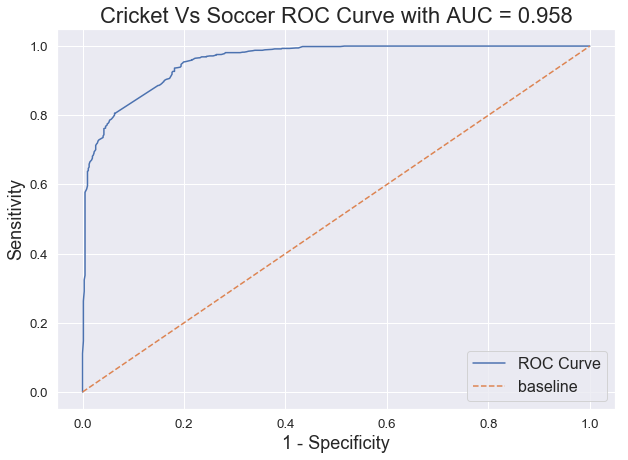

In [54]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Cricket Vs Soccer ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

##### Interpreting ROC AUC

**We have an ROC AUC of close to 1.In otherwords in our Logistics Regression model our Cricket (positive) and Soccer (negative) populations are 95% perfectly separated. Looking at our model we can conclude that our model is very close to as good as it can get.**

## Conclusion and Recommendations

**Conclusions :**
Using Pushshift's API we have successfully collected data from two of the subreddits viz. Cricket and Soccer. After doing the initial cleanup we have concatenated the dataframes to be used for training the model.
During the EDA we were able to find the most engaging posts,trend of the daywise engagement from Fans and most frequent words. 
Using NLP we have trained our classifiers. We have calaculated Base Line Score (Section 5.1), Logistic Regression Model score (Section 5.2 and 5.3), Gaussian NB Model (Section 5.4), Multinomial NB (Section 5.5) and Random Forest Model(Section 5.6) during our modeling process. We have used Count Vectorizer and TFIDF Vectorizer in our models.

**All the models we have trained outperformed the Base Line model. TFIDF vector with Logostics Regression had the best Train and Test score. The scores were 0.92 on the Train Score and 0.88 on the Test score.**

**Recommendations :**

While our mdel trained on Logistic Rgression with TFIDF vectorizer performed better than other models we still think there is a scope of improvement in the accuracy of the models. The present model is also slightly overfit. If we can get more data with different source other than Reddit we will be able to better train our classifiers. We will also like to train our models on other classifiers like Decision tree and Support Vector machines.
